In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('kaggle9/train.csv')
test = pd.read_csv('kaggle9/test.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


In [3]:
train.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,...,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,...,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,276527.540593,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,...,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,6.732441e+16,3155.991777,0.408426,0.499998
min,0.000000,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,...,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8.944400e+15,-415.240000,-0.151240,0.000000
25%,239479.500000,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,9.120900e+04,1.153100e+13,...,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,2.321100e+14,1306.200000,0.276560,0.000000
50%,478959.000000,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,2.896700e+05,5.043050e+14,...,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,1.327500e+16,3228.000000,0.473440,0.000000
75%,718438.500000,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,5.605600e+05,3.103100e+15,...,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,5.278700e+16,6137.900000,0.746210,1.000000
max,957918.000000,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1.913700e+06,1.042400e+16,...,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,3.249900e+17,13151.000000,2.743600,1.000000


In [4]:
train_x = train.drop(['id','claim'], axis = 1)
train_y = train['claim']

In [5]:
train_y.value_counts()

0    480404
1    477515
Name: claim, dtype: int64

In [6]:
train_x.iloc[:,50:70].describe()
#눈에 보이는 이상치는 없는거같음

,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70
count,942487.000000,942604.000000,942457.000000,942494.000000,942497.000000,942452.000000,942346.000000,942464.000000,942519.000000,942359.000000,942488.000000,9.424010e+05,942509.000000,942341.000000,942505.000000,942505.000000,942433.000000,942300.000000,942367.000000,942657.000000
mean,56.638828,2683.140670,12.204214,137.373234,0.250631,0.411071,0.000012,-0.329313,3.058053,0.548762,0.273404,2.469247e+09,36.836014,0.212860,47835.926728,84.103569,608.154443,29.001846,1.212457,0.418355
std,88.181507,2525.289159,21.651584,16.041827,0.110021,0.323768,0.001520,0.281456,1.734140,0.268437,0.256322,2.903456e+09,34.702345,0.225066,36005.855757,36.030337,527.325080,27.358900,0.129314,0.493424
min,-131.950000,-721.610000,-26.637000,98.868000,-0.033956,-0.052052,-0.003899,-1.179000,0.683640,-0.150990,-0.196920,-1.825600e+09,-11.941000,-0.134780,-3302.600000,-22.021000,-68.682000,-2.159800,0.849220,-0.009201
25%,3.863550,642.425000,-0.198270,125.010000,0.202290,0.092032,-0.001136,-0.410240,1.774100,0.370200,0.043406,2.707300e+08,8.752000,0.035596,10531.000000,74.376000,144.070000,6.972050,1.138400,-0.000753
50%,18.403000,2002.700000,2.232600,133.670000,0.268290,0.388570,0.000010,-0.235250,2.467600,0.601050,0.187970,1.425700e+09,27.225000,0.143450,75330.000000,92.345000,490.840000,21.199000,1.181300,0.004165
75%,71.787500,3946.800000,14.658000,151.580000,0.327900,0.711990,0.001163,-0.137950,3.903150,0.774930,0.506130,3.615900e+09,53.880000,0.315880,80364.000000,105.240000,924.010000,42.949250,1.242900,0.998270
max,503.170000,14553.000000,131.750000,175.160000,0.496070,1.186600,0.003906,0.071947,7.734600,1.014100,1.075100,1.828900e+10,210.430000,1.352000,91871.000000,161.750000,1996.700000,167.660000,1.891700,1.017900


In [7]:
features = train_x.columns.values.tolist()
for feature in features:
    train_x[feature] = train_x[feature].fillna(train_x[feature].mean())
    test[feature] = test[feature].fillna(train_x[feature].mean())

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state=42)

In [14]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 15,num_leaves=150)
lgbm_clf.fit(x_train, y_train )


pred = lgbm_clf.predict_proba(x_test)
print(roc_auc_score(y_test,pred[:,1]))
pred2 = lgbm_clf.predict_proba(x_train)
print(roc_auc_score(y_train,pred2[:,1]))

0.7776314826557429
0.8215091331737758


In [13]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(random_state=42)

params = {
    'max_depth' : [16],
    'num_leaves' : [100,130,150]
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv = 3)
gridcv.fit(x_train, y_train)
print(gridcv.best_params_)
print(roc_auc_score(y_test,gridcv.predict_proba(x_test)[:,1]))

{'max_depth': 16, 'num_leaves': 150}
0.7709422512658552


NameError: name 'gridcv' is not defined

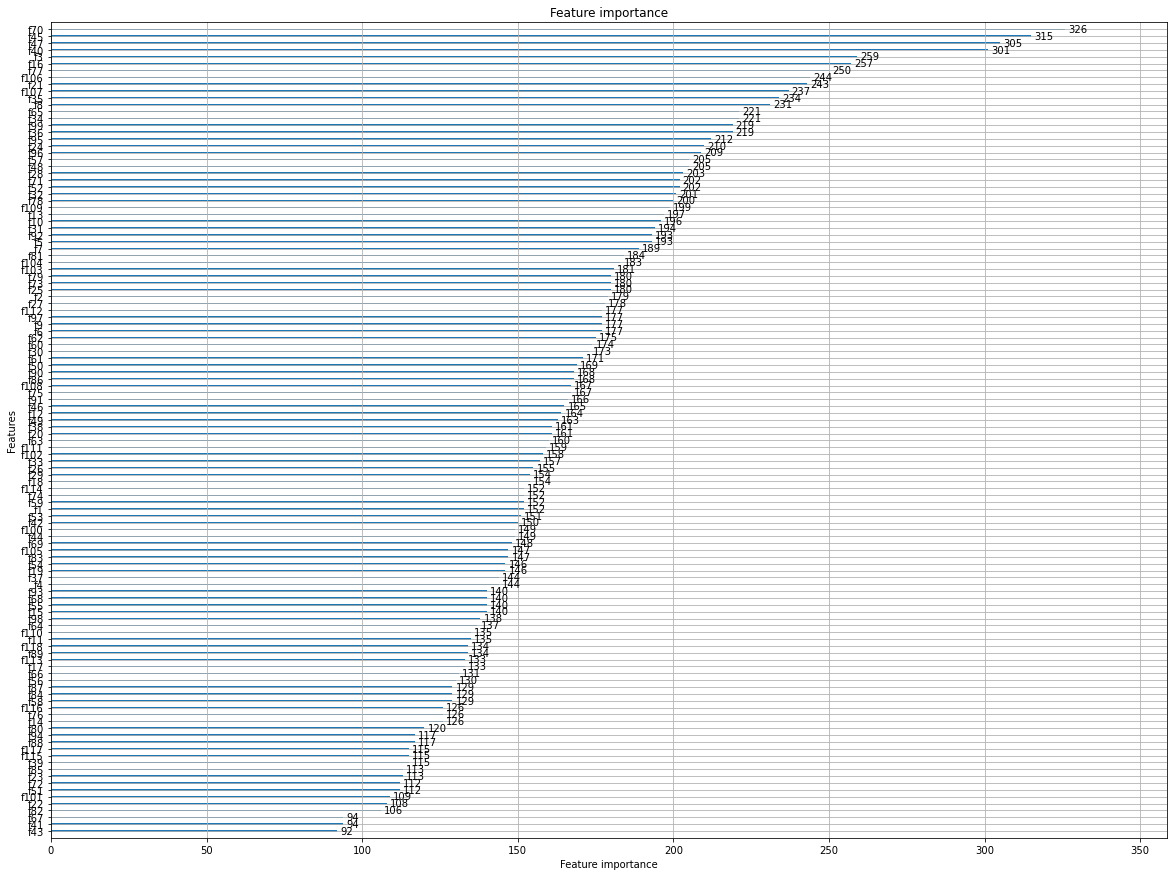

In [15]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,15))
plot_importance(lgbm_clf, ax= ax)


In [14]:
from sklearn.metrics import roc_auc_score
import numpy as np
pred = lgbm_clf.predict_proba(x_test)
print(roc_auc_score(y_test,pred[:,1]))
pred2 = lgbm_clf.predict_proba(x_train)
print(roc_auc_score(y_train,pred2[:,1]))

0.7673499667380322
0.8232412106071222


In [15]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 15,num_leaves=150)
lgbm_clf.fit(train_x, train_y)


ValueError: Number of features of the model must match the input. Model n_features_ is 118 and input n_features is 119 

In [24]:
pred = lgbm_clf.predict_proba(test.iloc[:,1:])
test['claim'] = pred[:,1]
final = test[['id', 'claim']]
final.to_csv(r'F:/kaggle9/kaggle9_4.csv',encoding='UTF-8', index=False)